# Kaggle Competition: House Prices: Advanced Regression Techniques

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

## Outline: 
1. Data Import
2. EDA
3. Data Preprocessing
4. Establishment of Best Base Models
5. Finetuning of Hyperparameters
7. Benchamrk of Basemodel versus Deep Learning Model
8. Conclusional Remarks

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score # To be replaced with RMSLE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [2]:
# Data Import and first look
train_path = r"C:\Users\Marco\Documents\Repositories\kaggle_housing_prices\train.csv"
test_path = r"C:\Users\Marco\Documents\Repositories\kaggle_housing_prices\test.csv"

train_data = pd.read_csv(train_path,index_col= 'Id',na_filter = False)
test_data = pd.read_csv(test_path,index_col= 'Id',na_filter = False)

print(train_data.shape)
print(train_data.info())
print(train_data.head())
print(train_data.describe())

(1460, 80)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd   

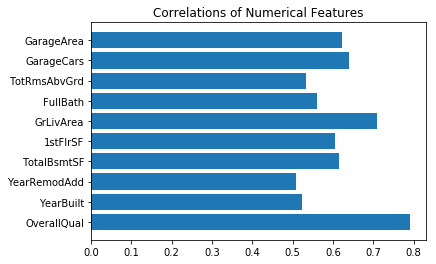

In [3]:
# EDA of numerical training Data -> Find highly correlated features
feature_list = [col for col in train_data if train_data[col].dtypes=='int64']
correlations = list(map(lambda x: np.corrcoef(train_data['SalePrice'],train_data[x])[0,1],feature_list))
corr_data = list(zip(feature_list,correlations))
high_correlations = [feature for feature in corr_data if (abs(feature[1])>0.5 and feature[0]!='SalePrice')]
plot_features, plot_corrs = zip(*high_correlations)
plt.subplot()
plt.barh(plot_features,width=plot_corrs)
plt.title('Correlations of Numerical Features')
plt.show()

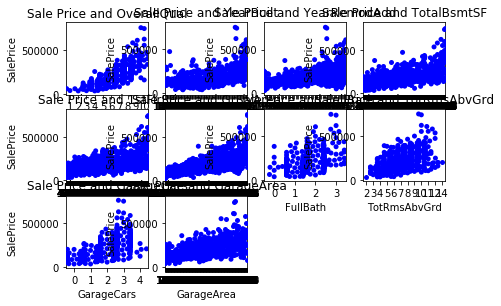

In [4]:
#EDA plot correlation of Sales Prices with these features

fig,ax = plt.subplots()
fig.tight_layout()

for i,title in enumerate(plot_features,start=1):
    plt.subplot(3,4,i)
    sns.swarmplot(y='SalePrice',x=title,data=train_data,color='blue')
    plt.title('Sale Price and ' + title)
plt.show()

In [5]:
# EDA with categorical features
objs = [obj for obj in train_data if train_data[obj].dtype=='object']
obj_data = train_data.loc[:,objs]

In [8]:
# Data Preprocessing -> Create Pipeline

# Extension for linear regression
linear_steps = [('ohe',OneHotEncoder()),
                ('scaler',StandardScaler(with_mean=False)),
                ('poly',PolynomialFeatures(degree=3)),
                ('linearReg',LinearRegression())]
linear_pipeline = Pipeline(linear_steps)

# Extension for AdaBoost
ada_steps = [('ohe',OneHotEncoder()),
             ('scaler',StandardScaler(with_mean=False)),
             ('adaReg',AdaBoostRegressor())]
ada_pipeline = Pipeline(ada_steps)

# Extension for GradientBoost
gb_steps = [('ohe',OneHotEncoder()),
            ('scaler',StandardScaler(with_mean=False)),
            ('gbReg',GradientBoostingRegressor())]
gb_pipeline = Pipeline(gb_steps)

# Create Testcases
models = [linear_pipeline,ada_pipeline,gb_pipeline]
names = ['LinearRegression','AdaBoostRegression','GradientBoostingRegression']

# Creation of Train and test data
X = train_data.drop('SalePrice',axis=1)
y = train_data.loc[:,'SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [9]:
# Check each model
results = {}
m = 0
for name,model in list(zip(names,models)):
    m +=1
    model.fit(X_train,y_train)
    yhat = model.predict(X_test)
    results['name'] = r2_score(y_test,yhat)
    print('Model {} erfolgreich!'.format(m))

print(results)

KeyboardInterrupt: 